In [1]:
# In this notebook, we will analyze various methods and attributes of crocoddyl and see how they change 
# when warmstarted.

# Given the two metrics, let's check 
# if crocoddyl exhibits odd behavior with the purpose of finding out 
# what a good guess from neural net should look like.

#So, let's conduct the same experiment but

#1: Full warmstart. Both xs, and us should be used

#2: Add noise to the warmstart guesses( both xs, us).


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import crocoddyl
import matplotlib.pyplot as plt

In [4]:

# Starting position
x = np.array([np.random.uniform(-2, 2),
              np.random.uniform(-2, 2),
              np.random.uniform(-np.pi, np.pi)]).T 

# Gaussian noise with 0 mean and standard deviation 1. 
mean  = 0
deviation = 1.

noise_xs =  np.random.normal(mean,deviation,30).reshape(-1, 1)
noise_us =  np.random.normal(mean,deviation,30).reshape(-1,1)
# Starting point [X, Y, Theta] 

# Let's solve this problem

model             = crocoddyl.ActionModelUnicycle()
model.costWeights = np.array([1.5, 1]).T
problem           = crocoddyl.ShootingProblem(x, [model] * 30, model)
ddp               = crocoddyl.SolverDDP(problem)
log               = crocoddyl.CallbackLogger()
ddp.setCallbacks([log])
ddp.th_stop       = 1e-9
ddp.solve([], [], 1000)

warmstart_xs      = np.array(ddp.xs) + 4
warmstart_us      = np.array(ddp.us)+ 4


#warmstart_xs[1:,:] = warmstart_xs[1:,:] + noise_xs


model2            = crocoddyl.ActionModelUnicycle()   
model2.costWeights= np.array([1.5, 1]).T
problem2          = crocoddyl.ShootingProblem(x, [model2] * 30, model2)
ddp2              = crocoddyl.SolverDDP(problem2)
log2              = crocoddyl.CallbackLogger()
ddp2.setCallbacks([log2])
ddp2.solve(warmstart_xs,warmstart_us,1000)

True

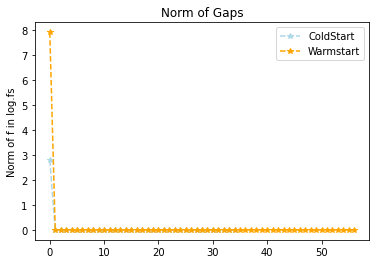

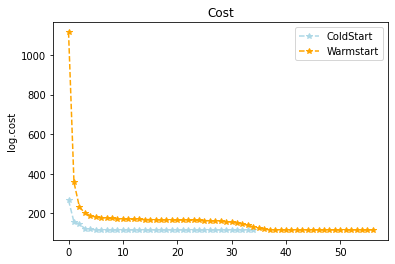

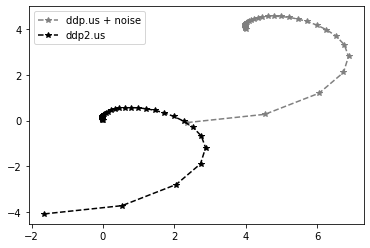

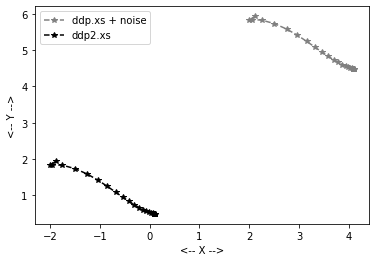

In [6]:
plt.plot([np.linalg.norm(f) for f in log.fs],'--*',c = "lightblue", label = "ColdStart")
plt.plot([np.linalg.norm(f) for f in log2.fs],"--*",c = "orange", label = "Warmstart")
plt.legend()
plt.title("Norm of Gaps")
plt.ylabel("Norm of f in log.fs")
#plt.savefig("grad.png")
plt.show()

plt.plot(log.costs, '--*',c = "lightblue", label = "ColdStart", )
plt.plot(log2.costs, "--*",c = "orange", label = "Warmstart")
plt.legend()
plt.title("Cost")
plt.ylabel("log.cost")

#plt.savefig("log_cost.png")
plt.show()



us2 = np.array(ddp2.us)
plt.plot(warmstart_us[:,0], warmstart_us[:,1],"--*",c = "grey",label =  "ddp.us + noise")
plt.plot(us2[:,0], us2[:,1],"--*", c = "black",label = "ddp2.us")
plt.legend()
#plt.savefig("us.png")
plt.show()

xs2 = np.array(ddp2.xs)
plt.plot(warmstart_xs[:,0], warmstart_xs[:,1],"--*",c = "grey",label =  "ddp.xs + noise")
plt.plot(xs2[:,0], xs2[:,1],"--*", c = "black",label = "ddp2.xs")
plt.legend()
plt.xlabel("<-- X -->")
plt.ylabel("<-- Y -->")
#plt.savefig("xs.png")
plt.show()